<a href="https://colab.research.google.com/github/natalia2000-jpg/Machine-learning/blob/main/%CE%95%CF%81%CE%B3%CE%B1%CF%83%CE%AF%CE%B1_6b_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Εργασία 6-Data Engineering


όνομα:Ναταλία Ταμβακίδου ΑΕΜ:200


#Ερώτημα 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import xgboost as xgb
import itertools
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor,BaggingRegressor,StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from itertools import product
from sklearn.model_selection import GridSearchCV
import pandas as pd
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,make_scorer
from sklearn.neighbors import KNeighborsClassifier
from PIL import Image
import pandas as pd
!pip install ydata-profiling
from ydata_profiling import ProfileReport
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import umap
!pip install umap-learn


In [ ]:
df=pd.read_csv('/content/bankloan.csv')

Σχόλιο: Χρησιμοποίωντας την βιβλιοθήκη ydata-profiling παίρνουμε πληροφορίες για το datafram.Από το Overview και συγκεκριμένα απο την καρτέλα Alerts μπορουμε να δούμε με ποίες μεταβλητές θα χρειαστεί πιθανώς να ασχοληθούμε στο στάδιο Data preprocessing.Κάποιες απο αυτές είναι:


1.   Μεταβλητές που περίχουν missing values(π.χ. Row ID,emp_title)
2.   Μεταβλητές που έχουν μεγάλο ποσοστό απο zeros (π.χ. delung_2yrs,total_rec_late_free)
3. Μεταβλητές που έχουν χαρακτηριστεί ως Skewed και πιθανώς θα χρειαστεί να εφαρμόσουμε κάποιον μετασχηματισμό (π.χ.log)
4. Θα χρειαστεί να ελεγχθεί η Unnamed,η οποία έχει χαρακτηριστσεί ως Unsupported.



#Ερώτημα 2


Ερώτηση 1


Με βάση της πληροφορίες που πήραμε από το ερώτημα 1 για το σύνολο των δεδομένων μας, η μεταβλητή loan_amnt που απαιτούν οι υποψήφιοι παίρμνει τιμές
*   min:1000
*   max:35000
*   mean:15257.966



In [ ]:
grade_stats = df.groupby('grade')['loan_amnt'].agg(['mean', 'min', 'max']).sort_index()
print(grade_stats)

               mean   min    max
grade                           
A      14841.094869  1000  35000
B      14077.348501  1000  35000
C      14913.255050  1000  35000
D      16182.334762  1000  35000
E      18656.693114  1000  35000
F      20032.652392  1000  35000
G      19652.028509  1750  35000


Ωστόσο αν το δούμε ανα κατηγορία κατάταξης των υποψήφιων,παρατηρούμε ότι όσο καταβαίνουμε στην βαθμίδα (από Α προς G) τόσο αυξάνεται το μέσο ποσό δανείου που αιτούνται οι υποψήφιοι.Αυτό σημαίνει ότι οι υποψήφιοι υψηλόυ ρίσκου F,G τείνουν να ζητούν σημαντικά μεγαλύτερα ποσά σε σύγκριση με αυτούσ των βαυμιδών Α και Β.

Ερώτηση 2

Γενικά οι μεταβλητές που μπορούν να αφαιρεθούν από ένα Dataframe πριν απο την εκπαίδευση του μοντέλου είναι:
*   Χαρακτηριστικά που παίρνουν μοναδικές τιμές, όπως το id ενοσ πελάτη.
*   Χαρακτηριστικά που έχουν missing values σε ποσοστό =>90%.
*   Χαρακτηριστικά με σταθερές τιμές ή πολυ μικρή διακύμναση.

*   Χαρακτηριστικά με μεγάλο ποσοστό zeros.







In [ ]:
#Αφαίρεση χαρακτηριστικών με μοναδικές τιμές
df = df.drop(['Row ID','id', 'member_id'], axis=1)

In [ ]:
#Αφαίρεση χαρακτηριστικών με μεγάλο ποσοστό missing values
df=df.drop(['annual_inc_joint', 'dti_joint','36months','60months'], axis=1)

In [ ]:
#Αφαίρεση χαρακτηριστικών με μεγάλο ποσστό zeors
df=df.drop(['total_rec_prncp','total_rec_late_fee','recoveries','collection_recovery_fee','collections_12_mths_ex_med','acc_now_delinq'],axis=1)

In [ ]:
#Αφαίρεση χαρακτηριστικών με μικρό std
#βρίσκουμε την std μονο για τις αριθμητικέσ μεταβλητές
df.select_dtypes(include='number').std()

,0
loan_amnt,8611.713377
funded_amnt,8611.713377
int_rate,4.249365
installment,245.858646
annual_inc,81880.646867
dti,31.925871
delinq_2yrs,0.921209
inq_last_6mths,0.861729
mths_since_last_delinq,22.031958
open_acc,5.663604


In [ ]:
#Αφαιρούμε αυτές με std μικρότερο απο 1
df=df.drop(['delinq_2yrs','inq_last_6mths','pub_rec'],axis=1)

In [ ]:
#Έλεγχος για την μεταβλητή unnamed:50
df['Unnamed: 50'].unique()


array([nan])

In [ ]:
df=df.drop(['Unnamed: 50'],axis=1)

Ερώτηση 3

Σε αυτό το στάδιο θα προσθέσουμε τις ελλειπές τιμές και θα κάνουμε μετασχηματισμό στις μεταβλητές που χαρακτηριστικαν ως Skewed

In [ ]:
print(df.isnull().sum())

loan_amnt                           0
funded_amnt                         0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       12790
emp_length                      12767
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
loan_status                         0
purpose                             0
title                              15
dti                                 0
earliest_cr_line                    0
mths_since_last_delinq         103371
open_acc                            0
revol_bal                           0
revol_util                         82
total_acc                           0
initial_list_status                 0
out_prncp                           0
total_pymnt                         0
total_rec_in

In [ ]:
#για τις αριθμητικέ μεταβλητές συμπληρώνουμε missing values με τον μέσο όρο
numeric_columns=df.select_dtypes(include='number').columns
for i in numeric_columns:
  df[i]=df[i].fillna(df[i].mean())

#για τις κατηγορικέσ μεταβλητές συμπληρώνουμε missing values με την πιο συχνή τιμή
categorical_columns=df.select_dtypes(include='object').columns
for i in categorical_columns:
  df[i]=df[i].fillna(df[i].mode()[0])

In [ ]:
print(df.isnull().sum())

loan_amnt                      0
funded_amnt                    0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
purpose                        0
title                          0
dti                            0
earliest_cr_line               0
mths_since_last_delinq         0
open_acc                       0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_list_status            0
out_prncp                      0
total_pymnt                    0
total_rec_int                  0
last_pymnt_d                   0
last_pymnt_amnt                0
next_pymnt_d                   0
last_credi

In [ ]:
#Μετασχηματισμό των μεταβλητων που χαρακτηρίστικαν ως Skewed
skewed_columns=['annual_inc','dti','last_pymnt_amnt','tot_coll_amt']
for i in skewed_columns:
  df[i]=np.log1p(df[i])

Ερώτηση 4

In [ ]:
df['sub_grade'].unique()

array(['C1', 'C2', 'B3', 'B4', 'E4', 'C5', 'D4', 'E1', 'D3', 'A5', 'D5',
       'B1', 'E2', 'A2', 'E3', 'F5', 'D2', 'G5', 'C4', 'B5', 'G2', 'G1',
       'F2', 'D1', 'F1', 'C3', 'B2', 'E5', 'F4', 'A4', 'A3', 'F3', 'G4',
       'G3', 'A1'], dtype=object)

In [ ]:
approved_grades=['A1','A2','A3','A4','A5','B1','B2']
df['loan_approved']=df['sub_grade'].apply(lambda x: 1 if x in approved_grades else 0)


In [ ]:
print(df[["sub_grade","loan_approved"]].head(20))

   sub_grade  loan_approved
0         C1              0
1         C2              0
2         B3              0
3         B4              0
4         E4              0
5         C5              0
6         B4              0
7         D4              0
8         C2              0
9         E1              0
10        D3              0
11        A5              1
12        E1              0
13        D5              0
14        B1              1
15        E2              0
16        A2              1
17        D5              0
18        B1              1
19        E3              0


Σχόλιο: Για να γίνει χορήγηση δανίων μόνο στης κατηγορίες Α,Β1,Β2 θα πρέπει το target να βασιστεί στο χαρακτηριστικό sub_grade.Συνεπώς η καινούργια στείλει loan_aprroved,το target,είναι δυαδική και παίρνει την τιμη 1 αν ο πελάτης ανήκει στις επιθυμητές κατηγορίες και 0 αν δεν ανήκει.Κατάλληλα μοντέλα πρόβλεψης για αυτήν την περίπτωση ειναι Logistic Regression και Decision Trees,όπως και το Random Forest αν δεν μας ενδιαδέρει και τόσο η πλήρη εξήγηση των αποτελεσμάτων.

Ερώτηση 5

In [ ]:
mask = (df['loan_approved'] == 1)
approved_amounts = df.loc[mask, 'loan_amnt']

counts = approved_amounts.value_counts().sort_values(ascending=False)
print(counts)


loan_amnt
10000    5475
12000    4391
15000    4277
20000    4135
5000     2669
         ... 
5975        1
32300       1
27875       1
16875       1
32150       1
Name: count, Length: 1079, dtype: int64


Παρατηρούμε ότι τα δάνεια αξίας απο 10000-20000 έχουν γίνει αρκετές φορές δεκτά,όποτε το δίαστημα 10000-20000 είναι αυτο που θα ελέγξουμε αν έχει πιθανότητα >=15%

In [ ]:
#θα βρούμε την πιθανότητα για το διάστημα 10000-20000
mask_1=(df['loan_amnt']>=10000)&(df['loan_amnt']<=20000)
p=df[mask_1]['loan_approved'].mean()
print("η Πιθανότητα έγκρισης δανείου με έυρος 10000-20000 είναι:",p*100)

η Πιθανότητα έγκρισης δανείου με έυρος 10000-20000 είναι: 29.963982454022293


#Ερώτημα 3

In [ ]:
print(df)

        loan_amnt  funded_amnt        term  int_rate  installment grade  \
0           20000        20000   36 months     12.29       667.06     C   
1           11000        11000   36 months     12.69       369.00     C   
2            7000         7000   36 months      9.99       225.84     B   
3           10000        10000   36 months     10.99       327.34     B   
4            9550         9550   36 months     19.99       354.87     E   
...           ...          ...         ...       ...          ...   ...   
212994      20000        20000   36 months     13.33       677.07     C   
212995       6000         6000   36 months     11.53       197.95     B   
212996      18000        18000   60 months     19.19       468.82     E   
212997       7050         7050   36 months     15.61       246.51     D   
212998       3500         3500   36 months     13.99       119.61     C   

       sub_grade              emp_title emp_length home_ownership  ...  \
0             C1       Ac

Ερώτηση 1

Παρατηρούμε ότι τα αριθμητικά χαρακτηριστικά παίρνουν τιμές σε διαφορετικά διαστήματα.Συνεπώς προκειμένου να κρατήσουμε τις αναλογίες αλλά και να οριστούν στο ίδιο διάστημα θα κανονικοποιήσουμε τα δεδομένα μας στο δίαστημα [0,1] χρησιμοποιώντας την μέθοδο min-max.

In [ ]:
df=df.drop(['grade',"sub_grade",'loan_status'],axis=1)

In [ ]:
df['emp_length'] = df['emp_length'].str.extract('(\d+)').astype(int)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-1244408241.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['emp_length'] = df['emp_length'].str.extract('(\d+)').astype(int)


In [ ]:
numeric_columns=df.select_dtypes(include='number').columns
categorical_columns=df.select_dtypes(include='object').columns

In [ ]:
print(numeric_columns)

Index(['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'dti', 'mths_since_last_delinq', 'open_acc', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_int',
       'last_pymnt_amnt', 'mths_since_last_major_derog', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'loan_approved'],
      dtype='object')


In [ ]:
print(categorical_columns)

Index(['term', 'emp_title', 'home_ownership', 'verification_status', 'issue_d',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d',
       'application_type'],
      dtype='object')


In [ ]:
#απο το cateforical_columns  θα κρατησουμε τις 10 πιο συχνές κατηγορίες και τις υπόλοιπες θα
#τισ βαλουμε other γιατί αλλιώς κρασάρει το colab
for i in categorical_columns:
  top_categories=df[i].value_counts().nlargest(10).index
  df[i]=df[i].apply(lambda x: x if x in top_categories else 'other')

In [ ]:
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True, sparse=False)

In [ ]:
#κανονικοποιούμε τις αριθμητικες μεταβλητές
df[numeric_columns]=MinMaxScaler().fit_transform(df[numeric_columns])

Ερώτηση 2

In [ ]:

x=df.drop(['loan_approved'],axis=1).values
y=df['loan_approved'].values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

Ερωτηση 3

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000,random_state=0)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)


Σχόλιο: Ο ταξινομητής που επιλέχθηκε είναι ο LogisticRegresion.Όπως αναφέραμε και πιο πάνω έπρεπε να χρησιμοποήσουμε ένα μοντέλο τέτοιο ώστε να μπορύν να ερμήνεευτούν τα αποτελέσματα,δεν έγινε η χρήση DecisionTree για να αποφευχθεί η υπερπεπροσαρμογή μιας και η μεταβλητή target δεν έχει ομοιογένεια.

Ερώτηση 3

In [ ]:
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("F1:",f1_score(y_test,y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Precision: 0.9995650519219268
Recall: 0.9998912274976886
F1: 0.9997281131049484
Accuracy: 0.9998435054773083


Σχόλιο: Στην συγκεκριμένη περίπτωση θέλουμε να είμαστε σίγουροι ότι προβλέψαμε σωστά αυτόυς που δικαιούνται να παρρουν δάνιο άκομα και αν κάποιοι μας ξέφυγαν(δηλαδή υπήρχαν άτομο που μπορούσαν να πάρουν δάνιο άλλα λανθασμένα προβλέγτηκαν ως ακατάλληλοι).Για αυτό το λόγο η καλύτερη μετρική είναι η Precision.



#Ερώτημα 4

Ερώτηση 1

In [ ]:
model=DecisionTreeClassifier(random_state=0)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test,y_pred))

Accuracy: 0.9999843505477308
Precision: 1.0


In [ ]:
feature_names=df.drop('loan_approved',axis=1).columns
importances=model.feature_importances_
importance_df=pd.DataFrame({'Feature':feature_names,'Importance':importances})
importance_df=importance_df.sort_values('Importance',ascending=False)
print('Top 15 features:',importance_df.head(15))

Top 15 features:                    Feature    Importance
2                 int_rate  9.999346e-01
67  earliest_cr_line_2-Oct  3.242744e-05
0                loan_amnt  3.238047e-05
14           total_rec_int  3.346197e-07
63          title_Vacation  2.891410e-07
1              funded_amnt  0.000000e+00
3              installment  0.000000e+00
7   mths_since_last_delinq  0.000000e+00
8                 open_acc  0.000000e+00
5               annual_inc  0.000000e+00
4               emp_length  0.000000e+00
10              revol_util  0.000000e+00
11               total_acc  0.000000e+00
12               out_prncp  0.000000e+00
13             total_pymnt  0.000000e+00


Ερώτηση 2

In [ ]:
top15_features=importance_df.head(15)['Feature'].tolist()
corr_matrix=df[top15_features].corr()
print(corr_matrix)

                        int_rate  earliest_cr_line_2-Oct  loan_amnt  \
int_rate                1.000000                0.006970   0.142637   
earliest_cr_line_2-Oct  0.006970                1.000000  -0.004498   
loan_amnt               0.142637               -0.004498   1.000000   
total_rec_int           0.462989               -0.001493   0.613110   
title_Vacation          0.016056               -0.000702  -0.072879   
funded_amnt             0.142637               -0.004498   1.000000   
installment             0.117848               -0.005534   0.942279   
mths_since_last_delinq -0.016673                0.002666  -0.020480   
open_acc               -0.015259                0.000193   0.193466   
annual_inc             -0.154598               -0.001069   0.522331   
emp_length             -0.014291               -0.003807   0.056134   
revol_util              0.206321               -0.001018   0.127083   
total_acc              -0.040338                0.005339   0.211923   
out_pr

Σχόλιο: Απο το correlation matrix των 15 πιο σηματντικώμ χαρακτηριστικών προκύπτει ότι:

*   Υπάρχει ισχυρή θετική συσχέτιση μεταξύ των μεταβλητών που σχετίζονται με το ποσό του δανείου,όπως loan_amnt,funded_amnt,installment_out_prncp.Δηλαδή όσο πιο μεγάλο είναι το ποσό που ζητήθηκε και άντιστοιχα αυτό που εντέλει εγκρίθηκε τόσο μεγάλες ειναι και οι αντίσττοιχες οικονομικές επιβαρύνσεις.Ωστόδο,αυτή η ύψηλη συσχέτιση μπορεί να υποδηλώνει ότι οι μεταβλητές αυτές ππαρέχουν ουσιαστικά την ίδια πληροφορία,απλά εκφρασμένη με διαφορετικό τρόπο.
*  Από την άλλη πλευρά υπάρχουν χαρακτηριστικά με χαμηλή ή σχεδόν μηδενική συσχέτιση μεταξύ τους,όπως κατηγορηματικά χαρακτηριστικά που συσχετίζοναι με οικονιμικά μεγέθη



Ερώτηση 3

In [ ]:
#Απο τα 15 πιο σημαντικα χαρακτηριστικα θα αφαιρεσουμε καποια που
#εχουν μικρη συσχετιση και με υπολοιπα θα επαναλαβουμε την ερωτηση 1
keep_features=[]
for i in top15_features:
 if any(corr_matrix[i][other]>0.1 for other in top15_features if other!=i):
  keep_features.append(i)
print(keep_features)

['int_rate', 'loan_amnt', 'total_rec_int', 'funded_amnt', 'installment', 'open_acc', 'annual_inc', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt']


In [ ]:
x=df[keep_features].values
y=df['loan_approved'].values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

In [ ]:
model=DecisionTreeClassifier(random_state=0)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test,y_pred))

Accuracy: 0.9999843505477308
Precision: 1.0


#ερώτημα 5

Ερώτηση 1

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("train set:",x_train.shape,y_train.shape)
print("test set:",x_test.shape,y_test.shape)

train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


In [ ]:
x_train_vector=x_train.reshape(x_train.shape[0],784)
x_test_vector=x_test.reshape(x_test.shape[0],784)
print(x_train_vector.shape)
print(x_test_vector.shape)

(60000, 784)
(10000, 784)


Ερώτηση 2

In [ ]:
scaler=StandardScaler()
x_train_scal=scaler.fit_transform(x_train_vector)
x_test_scal=scaler.transform(x_test_vector)

Ερώτηση 3

In [ ]:
pca = PCA(n_components=300)
x_train = pca.fit_transform(x_train_scal)
x_test = pca.transform(x_test_scal)

Σχόλιο: Είναι σημαντικό να εφαρμόσουμε fit_transform μόνο στο train set και transform μόνο στο test set.Αυτό γίνεται γιατί,

*   Αν εφαρμόζαμε fit_transform ξεχωριστά στο train και test set,τα δυο σύνολα θα προβάλονταν σε διαφορετικούς χώρους χαρακτηριστικών και έτσι η ταξινομηση θα γινόταν λανθασμένα.
*  Αν ενώναμε τα x_train και x_test μαζί και εφαρμόζαμε PCA,θα προέκυπτε data leakage, οδηγώντας σε μη ρεαλιστική υψηλή ακρίβεια.



In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 300)
(10000, 300)


In [ ]:
k_values=[5,15,51,101]
for i in k_values:
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9497
Accuracy: 0.9436
Accuracy: 0.9273
Accuracy: 0.9158


Σχόλιο: Η ακρίβεια πέφτει όσο αυξάνεται το k και αυτό σημβαίνει γιατί το μοντέλο δεν μπρεί να οριθετήσει καλά τις κλάσεις επομένως ταξινομεί λανθασμένα κάποια δεδομένα.

Ερώτηση 4

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)

In [ ]:
x_train=lda.fit_transform(x_train_scal,y_train)
x_test=lda.transform(x_test_scal)
print(x_train.shape)
print(x_test.shape)

(60000, 2)
(10000, 2)


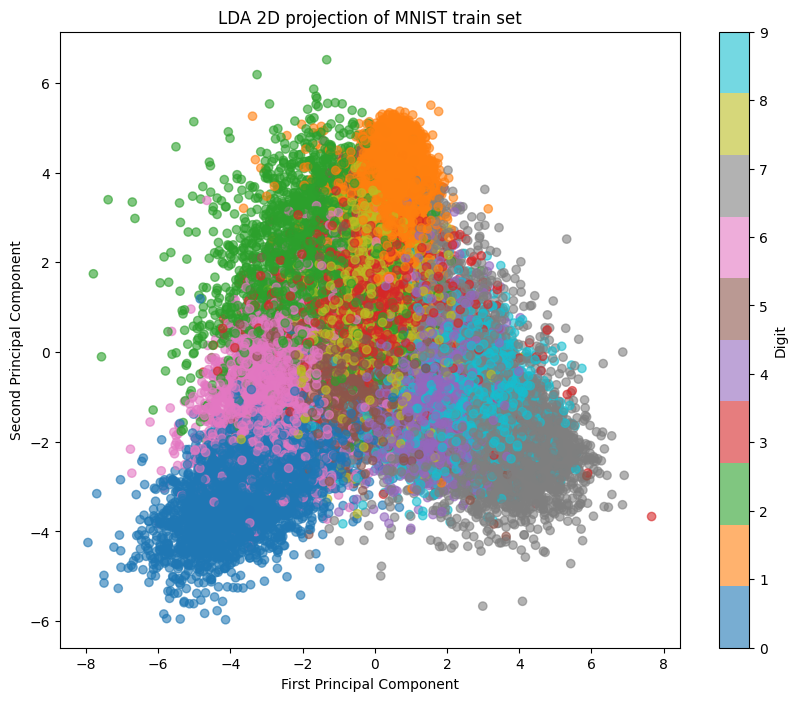

In [ ]:
plt.figure(figsize=(10,8))
scatter=plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap='tab10',alpha=0.6)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("LDA 2D projection of MNIST train set")
plt.colorbar(scatter, ticks=range(10), label='Digit')
plt.show()

Σχόλιο: Παρατηρούμε ότι τα διαφορετικά ψηφία προσπαθούν να διαχωριστούν κατά ομάδες στον διδιάστατο χώρο.Κάποια ψηφία όπως το 1 και το 0 είναι σχετικά καλά διαχωρισμένα , ενω όπως το 4,5,7,9 επικαλύπτονται.Το πρόβλημα τον επικαλύψεων θα μπορούσε να μειωθεί αν χρησιμοποιούσαμε LDA με περισσότερες διαστάσεις αλλά τότε θα "χάναμε" την οπτική αναπαράσταση του διαχωρισμού των κλάσεων.

Ερώτηση 5

In [ ]:
UMAP=umap.UMAP(n_components=2)
x_train=UMAP.fit_transform(x_train_scal)
x_test=UMAP.transform(x_test_scal)
print(x_train.shape)
print(x_test.shape)


(60000, 2)
(10000, 2)


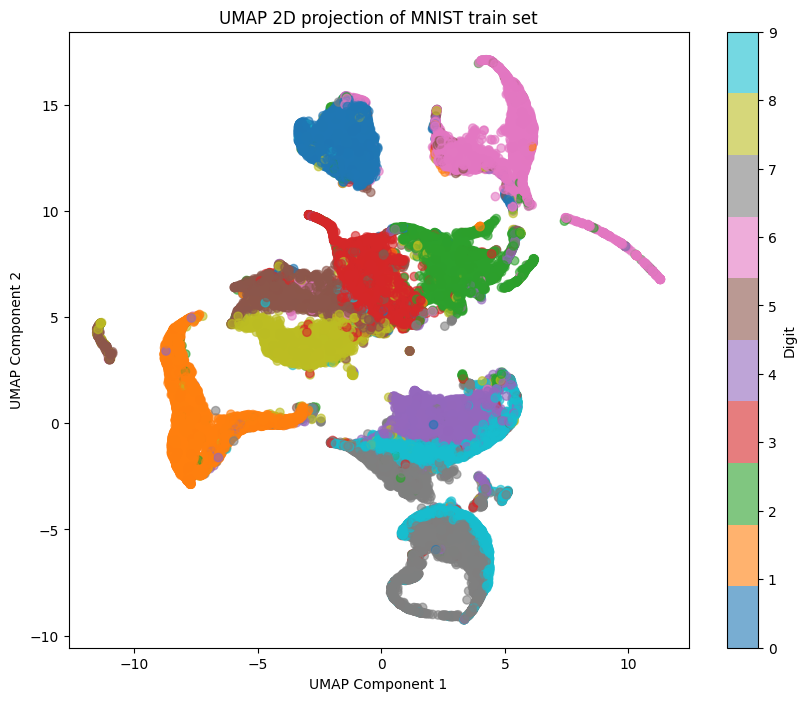

In [ ]:
plt.figure(figsize=(10,8))
scatter = plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap='tab10', alpha=0.6)
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.title("UMAP 2D projection of MNIST train set")
plt.colorbar(scatter, ticks=range(10), label='Digit')
plt.show()

Σχόλιο: Παρατηρούμε ότι χρησιμοποιώντας το UMAP έχουμε καλύτερη χωρική αναπαράσταση των κλάσεων σε σχέση με τον LDA.Αυτό συμβαίνει γιατί το UMAP προσπαθεί τόσο την τοπική όσο και την δομική πληροφορία των δεδομένων.